In [1]:
from nltk.corpus import wordnet as wn
import pandas as pd
import numpy as np

## Exploring WordNet
### Understanding Synsets

In [2]:
term = 'fruit'

In [3]:
synsets = wn.synsets(term)

In [4]:
synsets

[Synset('fruit.n.01'),
 Synset('yield.n.03'),
 Synset('fruit.n.03'),
 Synset('fruit.v.01'),
 Synset('fruit.v.02')]

In [13]:
for synset in synsets:
    print("Synset:{}\nPart of speech:{}\nDefinition:{}\nLemmas:{}\nExamples:{}".format(synset,
                                                                                           synset.lexname(),
                                                                                           synset.definition(),
                                                                                           synset.lemma_names(),
                                                                                           synset.examples()))
    print('-'*50)

Synset:Synset('fruit.n.01')
Part of speech:noun.plant
Definition:the ripened reproductive body of a seed plant
Lemmas:['fruit']
Examples:[]
--------------------------------------------------
Synset:Synset('yield.n.03')
Part of speech:noun.artifact
Definition:an amount of a product
Lemmas:['yield', 'fruit']
Examples:[]
--------------------------------------------------
Synset:Synset('fruit.n.03')
Part of speech:noun.event
Definition:the consequence of some effort or action
Lemmas:['fruit']
Examples:['he lived long enough to see the fruit of his policies']
--------------------------------------------------
Synset:Synset('fruit.v.01')
Part of speech:verb.creation
Definition:cause to bear fruit
Lemmas:['fruit']
Examples:[]
--------------------------------------------------
Synset:Synset('fruit.v.02')
Part of speech:verb.creation
Definition:bear fruit
Lemmas:['fruit']
Examples:['the trees fruited early this year']
--------------------------------------------------


### Analyzing Lexical Semantic Relations
### Entailments

In [19]:
for action in ['walk', 'eat', 'digest']:
    action_syn = wn.synsets(action, pos='v')[0]
    print("{} --entails--> {}".format(action_syn, action_syn.entailments()))

Synset('walk.v.01') --entails--> [Synset('step.v.01')]
Synset('eat.v.01') --entails--> [Synset('chew.v.01'), Synset('swallow.v.01')]
Synset('digest.v.01') --entails--> [Synset('consume.v.02')]


#### Homonyms and Homographs

In [20]:
for synset in wn.synsets('bank'):
    print("{} - {}".format(synset.name(), synset.definition()))

bank.n.01 - sloping land (especially the slope beside a body of water)
depository_financial_institution.n.01 - a financial institution that accepts deposits and channels the money into lending activities
bank.n.03 - a long ridge or pile
bank.n.04 - an arrangement of similar objects in a row or in tiers
bank.n.05 - a supply or stock held in reserve for future use (especially in emergencies)
bank.n.06 - the funds held by a gambling house or the dealer in some gambling games
bank.n.07 - a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
savings_bank.n.02 - a container (usually with a slot in the top) for keeping money at home
bank.n.09 - a building in which the business of banking transacted
bank.n.10 - a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
bank.v.01 - tip laterally
bank.v.02 - enclose with a bank
bank.v.03 - do business with a bank or keep an account at 

#### Synonyms and Antonyms

In [45]:
term = 'large'
synsets = wn.synsets(term, pos='a')

synset_adj = synsets[0]
adj_synonym = synset_adj.lemmas()[1].synset()
adj_antonym = synset_adj.lemmas()[1].antonyms()[0].synset()

print("Synonym: {}".format(adj_synonym.name()))
print("Definition: {}".format(adj_synonym.definition()))
print('Antonym: {}'.format(adj_antonym.name()))
print("Definition: {}".format(adj_antonym.definition()))

Synonym: large.a.01
Definition: above average in size or number or quantity or magnitude or extent
Antonym: small.a.01
Definition: limited or below average in number or quantity or magnitude or extent


In [39]:
synset.lemmas()[0].antonyms()

[Lemma('distrust.v.01.distrust'), Lemma('distrust.v.01.mistrust')]

In [44]:
synset_adj.lemmas()

[Lemma('large.a.01.large'), Lemma('large.a.01.big')]

In [50]:
term = 'rich'
synsets = wn.synsets(term)[:3]

for synset in synsets:
    
    lemma = synset.lemmas()[0]
    synonym = lemma.synset()
    antonym = lemma.antonyms()[0].synset()
    
    print("Synonym: {}".format(synonym.name()))
    print("Definition: {}".format(synonym.definition()))
    print("Synonym: {}".format(antonym.name()))
    print("Definition: {}".format(antonym.definition()))
    print('-'*50)

Synonym: rich_people.n.01
Definition: people who have possessions and wealth (considered as a group)
Synonym: poor_people.n.01
Definition: people without possessions or wealth (considered as a group)
--------------------------------------------------
Synonym: rich.a.01
Definition: possessing material wealth
Synonym: poor.a.02
Definition: having little money or few possessions
--------------------------------------------------
Synonym: rich.a.02
Definition: having an abundant supply of desirable qualities or substances (especially natural resources)
Synonym: poor.a.04
Definition: lacking in specific resources, qualities or substances
--------------------------------------------------


#### Hyponyms and Hypernyms

In [54]:
term = 'tree'
ss = wn.synsets(term)[0]

print("Name:", ss.name())
print("Definition:", ss.definition())

Name: tree.n.01
Definition: a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms


In [58]:
hyponyms = ss.hyponyms()
print("Total Hyponyms:", len(hyponyms))
print()
for h in hyponyms[:10]:
    print("{} - {}".format(h.name(), h.definition()))
    print()

Total Hyponyms: 180

aalii.n.01 - a small Hawaiian tree with hard dark wood

acacia.n.01 - any of various spiny trees or shrubs of the genus Acacia

african_walnut.n.01 - tropical African timber tree with wood that resembles mahogany

albizzia.n.01 - any of numerous trees of the genus Albizia

alder.n.02 - north temperate shrubs or trees having toothed leaves and conelike fruit; bark is used in tanning and dyeing and the wood is rot-resistant

angelim.n.01 - any of several tropical American trees of the genus Andira

angiospermous_tree.n.01 - any tree having seeds and ovules contained in the ovary

anise_tree.n.01 - any of several evergreen shrubs and small trees of the genus Illicium

arbor.n.01 - tree (as opposed to shrub)

aroeira_blanca.n.01 - small resinous tree or shrub of Brazil



In [69]:
hypernym = ss.hypernyms()[0]

In [70]:
hypernym

Synset('woody_plant.n.01')

In [72]:
" -> ".join(s.name() for s in ss.hypernym_paths()[0])

'entity.n.01 -> physical_entity.n.01 -> object.n.01 -> whole.n.02 -> living_thing.n.01 -> organism.n.01 -> plant.n.02 -> vascular_plant.n.01 -> woody_plant.n.01 -> tree.n.01'

#### Holonyms and Meronyms

In [73]:
term = 'tree'
tree = wn.synsets(term)[0]

In [75]:
tree_holonym = tree.member_holonyms()[0]
print("{} - {}".format(tree_holonym.name(), tree_holonym.definition()))

forest.n.01 - the trees and other plants in a large densely wooded area


In [79]:
tree_meronym = tree.part_meronyms()
for m in tree_meronym:
    print("{} - {}".format(m.name(), m.definition()))
    print()

burl.n.02 - a large rounded outgrowth on the trunk or branch of a tree

crown.n.07 - the upper branches and leaves of a tree or other plant

limb.n.02 - any of the main branches arising from the trunk or a bough of a tree

stump.n.01 - the base part of a tree that remains standing after the tree has been felled

trunk.n.01 - the main stem of a tree; usually covered with bark; the bole is usually the part that is commercially useful for lumber



In [82]:
substance_meronyms = tree.substance_meronyms()
print('Total substance meronyms:', len(substance_meronyms))
print()
for s in substance_meronyms:
    print("{} - {}".format(s.name(), s.definition()))
    print()

Total substance meronyms: 2

heartwood.n.01 - the older inactive central wood of a tree or woody plant; usually darker and denser than the surrounding sapwood

sapwood.n.01 - newly formed outer wood lying between the cambium and the heartwood of a tree or woody plant; usually light colored; active in water conduction



#### Semantic Relationships and Similarity

In [83]:
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

In [84]:
entities = [tree, lion, tiger, dog, cat]
names = [e.name().split('.')[0] for e in entities]
definitions = [e.definition() for e in entities]

In [85]:
entities

[Synset('tree.n.01'),
 Synset('lion.n.01'),
 Synset('tiger.n.02'),
 Synset('dog.n.01'),
 Synset('cat.n.01')]

In [86]:
names

['tree', 'lion', 'tiger', 'dog', 'cat']

In [87]:
definitions

['a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms',
 'large gregarious predatory feline of Africa and India having a tawny coat with a shaggy mane in the male',
 'large feline of forests in most of Asia having a tawny coat with black stripes; endangered',
 'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds',
 'feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats']

In [93]:
common_hypernyms = [[e1.lowest_common_hypernyms(e2)[0].name().split('.')[0] for e2 in entities]
                      for e1 in entities ]

In [94]:
common_hypernyms

[['tree', 'organism', 'organism', 'organism', 'organism'],
 ['organism', 'lion', 'big_cat', 'carnivore', 'feline'],
 ['organism', 'big_cat', 'tiger', 'carnivore', 'feline'],
 ['organism', 'carnivore', 'carnivore', 'dog', 'carnivore'],
 ['organism', 'feline', 'feline', 'carnivore', 'cat']]

In [95]:
pd.DataFrame(common_hypernyms, index=names, columns=names)

,tree,lion,tiger,dog,cat
tree,tree,organism,organism,organism,organism
lion,organism,lion,big_cat,carnivore,feline
tiger,organism,big_cat,tiger,carnivore,feline
dog,organism,carnivore,carnivore,dog,carnivore
cat,organism,feline,feline,carnivore,cat


In [97]:
similarities = [[e1.path_similarity(e2) for e2 in entities] for e1 in entities]

In [99]:
pd.DataFrame(similarities, index=names, columns=names).round(2)

,tree,lion,tiger,dog,cat
tree,1.00,0.07,0.07,0.12,0.08
lion,0.07,1.00,0.33,0.17,0.25
tiger,0.07,0.33,1.00,0.17,0.25
dog,0.12,0.17,0.17,1.00,0.20
cat,0.08,0.25,0.25,0.20,1.00


### Word Sense Disambiguation

In [100]:
from nltk.wsd import lesk
from nltk import word_tokenize

In [102]:
samples = [
    ('The fruits on that plant have ripened', 'n'),
    ('He finally reaped the fruit of his hard word as he won the race', 'n')
]

word = 'fruit'

In [103]:
for sent, tag in samples:
    word_syn = lesk(word_tokenize(sent.lower()), word, pos=tag)
    print("Sentence: {}".format(sent))
    print("Word synset: {}".format(word_syn))
    print("Corresponding definition: {}".format(word_syn.definition()))
    print('-'*50)

Sentence: The fruits on that plant have ripened
Word synset: Synset('fruit.n.01')
Corresponding definition: the ripened reproductive body of a seed plant
--------------------------------------------------
Sentence: He finally reaped the fruit of his hard word as he won the race
Word synset: Synset('fruit.n.03')
Corresponding definition: the consequence of some effort or action
--------------------------------------------------


In [104]:
samples = [
    ('Lead is a very soft, malleable metal', 'n'),
    ('John is the actor who plays the lead in that movie', 'n'),
    ('This road leads to nowhere', 'v')
]

word = 'lead'

In [105]:
for sent, tag in samples:
    word_syn = lesk(word_tokenize(sent.lower()), word, pos=tag)
    print("Sentence: {}".format(sent))
    print("Word synset: {}".format(word_syn))
    print("Corresponding definition: {}".format(word_syn.definition()))
    print('-'*50)

Sentence: Lead is a very soft, malleable metal
Word synset: Synset('lead.n.02')
Corresponding definition: a soft heavy toxic malleable metallic element; bluish white when freshly cut but tarnishes readily to dull grey
--------------------------------------------------
Sentence: John is the actor who plays the lead in that movie
Word synset: Synset('star.n.04')
Corresponding definition: an actor who plays a principal role
--------------------------------------------------
Sentence: This road leads to nowhere
Word synset: Synset('run.v.23')
Corresponding definition: cause something to pass or lead somewhere
--------------------------------------------------


### Named Entity Recognition

In [110]:
import re
import nltk

def parse_document(doc):
    doc = re.sub('\n', ' ', doc)
    return [s.strip() for s in nltk.sent_tokenize(doc)]

In [111]:

text = """
Bayern Munich, or FC Bayern, is a German sports club based in Munich, 
Bavaria, Germany. It is best known for its professional football team, 
which plays in the Bundesliga, the top tier of the German football 
league system, and is the most successful club in German football 
history, having won a record 26 national titles and 18 national cups. 
FC Bayern was founded in 1900 by eleven football players led by Franz John. 
Although Bayern won its first national championship in 1932, the club 
was not selected for the Bundesliga at its inception in 1963. The club 
had its period of greatest success in the middle of the 1970s when, 
under the captaincy of Franz Beckenbauer, it won the European Cup three 
times in a row (1974-76). Overall, Bayern has reached ten UEFA Champions 
League finals, most recently winning their fifth title in 2013 as part 
of a continental treble. 
"""

In [112]:
# tokenize sentences
sentences = parse_document(text)

In [114]:
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

In [118]:
tagged_sentences = [nltk.pos_tag(tokens) for tokens in tokenized_sentences]

In [120]:
ne_chunked_sents = [nltk.ne_chunk(tag_tokens) for tag_tokens in tagged_sentences]

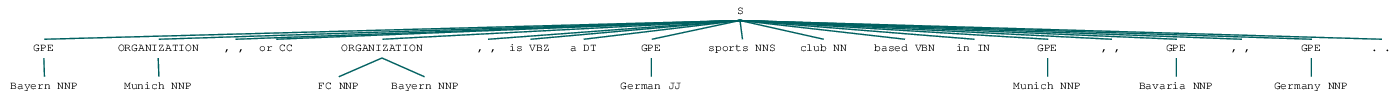

In [121]:
ne_chunked_sents[0]

In [122]:
a = ne_chunked_sents[0]

In [138]:
for i in a:
    print(i, hasattr(i, 'label'))
    if hasattr(i, 'label'):
        print(i.leaves(), i.label())

(GPE Bayern/NNP) True
[('Bayern', 'NNP')] GPE
(ORGANIZATION Munich/NNP) True
[('Munich', 'NNP')] ORGANIZATION
(',', ',') False
('or', 'CC') False
(ORGANIZATION FC/NNP Bayern/NNP) True
[('FC', 'NNP'), ('Bayern', 'NNP')] ORGANIZATION
(',', ',') False
('is', 'VBZ') False
('a', 'DT') False
(GPE German/JJ) True
[('German', 'JJ')] GPE
('sports', 'NNS') False
('club', 'NN') False
('based', 'VBN') False
('in', 'IN') False
(GPE Munich/NNP) True
[('Munich', 'NNP')] GPE
(',', ',') False
(GPE Bavaria/NNP) True
[('Bavaria', 'NNP')] GPE
(',', ',') False
(GPE Germany/NNP) True
[('Germany', 'NNP')] GPE
('.', '.') False


In [139]:
name_entities = []

for tagged_tree in ne_chunked_sents:
    for node in tagged_tree:
        if hasattr(node, 'label'):
            name = " ".join(c[0] for c in node.leaves())
            label = node.label()
            name_entities.append((name, label))

In [140]:
name_entities

[('Bayern', 'GPE'),
 ('Munich', 'ORGANIZATION'),
 ('FC Bayern', 'ORGANIZATION'),
 ('German', 'GPE'),
 ('Munich', 'GPE'),
 ('Bavaria', 'GPE'),
 ('Germany', 'GPE'),
 ('Bundesliga', 'ORGANIZATION'),
 ('German', 'GPE'),
 ('German', 'GPE'),
 ('Bayern', 'PERSON'),
 ('Franz John', 'PERSON'),
 ('Bayern', 'PERSON'),
 ('Bundesliga', 'ORGANIZATION'),
 ('Franz Beckenbauer', 'PERSON'),
 ('European', 'ORGANIZATION'),
 ('Overall', 'GPE'),
 ('Bayern', 'GPE'),
 ('UEFA', 'ORGANIZATION')]

In [141]:
from stanford_parser import stanford_ne_tagger

In [142]:
sn = stanford_ne_tagger

In [143]:
ne_annotated_sentences = [sn.tag(sent) for sent in tokenized_sentences]

In [152]:
name_entities = []

for tag_sent in ne_annotated_sentences:
    current_name = ''
    current_name_tag = None
    for name, tag in tag_sent:
        if tag != 'O':
            current_name = " ".join([current_name, name]).strip()
            current_name_tag = (current_name, tag)
        else:
            if current_name_tag:
                name_entities.append(current_name_tag)
                current_name_tag = None
                current_name = ''

In [154]:
pd.DataFrame(name_entities, columns=['Entity Name', 'Entity Type'])

,Entity Name,Entity Type
0,Bayern Munich,ORGANIZATION
1,FC Bayern,ORGANIZATION
2,Munich,LOCATION
3,Bavaria,LOCATION
4,Germany,LOCATION
5,FC Bayern,ORGANIZATION
6,Franz John,PERSON
7,Bayern,ORGANIZATION
8,Franz Beckenbauer,PERSON
9,Bayern,ORGANIZATION


### Analyzing Semantic Representations

#### Propositional Logic

In [14]:
import nltk
import pandas as pd
import os

from itertools import product

In [20]:
P = 'P'
Q = 'Q'
P_prop = 'He is hungry'
Q_prop = 'He will eat a sandwich'

In [3]:
p_status = [True, False]
q_status = [True, False]

In [4]:
conjunction = 'P & Q'
disjunction = "P | Q"
implication = 'P -> Q'
equivalence = 'P <-> Q'

expressions = [conjunction, disjunction, implication, equivalence]

In [24]:
results = []

for p_val, q_val in product(p_status, q_status):
    
    valu = nltk.Valuation([(P, p_val), (Q, q_val)])
    dom = set()
    assignment = nltk.Assignment(dom)
    model = nltk.Model(dom, valu)
    row = [p_val, q_val]
    for expr in expressions:
        row.append(model.evaluate(expr, assignment))
    results.append(row)
    
cols = [P, Q] + expressions

result_df = pd.DataFrame(results, columns=cols)

In [25]:
result_df

,P,Q,P & Q,P | Q,P -> Q,P <-> Q
0,True,True,True,True,True,True
1,True,False,False,True,False,False
2,False,True,False,True,True,False
3,False,False,False,False,True,True


#### First Order Logic

In [31]:
# init theorem provers
prover_path = "/home/pongsakorn/Desktop/python_learning/TextAnalyticsWithPython/LADR-2009-11A/bin"
os.environ['PROVER9'] = prover_path

prover = nltk.Prover9()

# for reading FOL expressions
read_expr = nltk.sem.Expression.fromstring

In [33]:
# `If an entity jumps over another entity, the reverse cannot happen`

# set the rule expression
rule = read_expr('all x. all y. (jumps_over(x, y) -> -jumps_over(y, x))')
# set the event occured
event = read_expr('jumps_over(fox, dog)')

# set the outcome to evaluate
test_outcome = read_expr("jumps_over(dog, fox)")

In [ ]:
prover.prove(goal=test_outcome, assumptions=[event, rule], verbose=True)

## Sentiment Analysis

#### getting dataset

```python
# aclimdb/[train|test\]/[pos|neg]
folder = './aclImdb/'

dataset = pd.DataFrame()

for d1 in ['train', 'test']:
    for d2 in ['pos', 'neg']:
        path = os.path.join(folder, d1, d2)
        for txt_file in os.listdir(path):
            with open(os.path.join(path, txt_file), 'r') as f:
                review = f.read().strip()              
                row = [review, d2]
                dataset = dataset.append([row], ignore_index=True)

idx = np.random.permutation(len(dataset))

dataset.columns = ['review', 'sentiment']

dataset = dataset.iloc[idx]

dataset.reset_index(drop=True, inplace=True)```

In [2]:
dataset.shape

NameError: name 'dataset' is not defined

### Text Normalization

In [3]:
from html import unescape
from html.parser import HTMLParser

import nltk
import unicodedata
import pickle
from nltk.corpus import stopwords
import re
import string

stop_words = set(stopwords.words('english'))
contractions = pickle.load(open('contraction_map.pkl', 'rb'))

class MLStripper(HTMLParser):
    '''class to remove html tag and unescape html characters'''
    
    def __init__(self, convert_charrefs=False):
        self.reset()
        self.fed = []
        self.convert_charrefs = convert_charrefs
        
    def handle_data(self, txt):
        self.fed.append(unescape(txt))
        
    def get_data(self):
        return " ".join(self.fed)

def expand_contraction(text, contractions):
    
    pattern = re.compile(r"({})".format('|'.join(contractions.keys())), flags=re.IGNORECASE|re.DOTALL)
    
    def expand(match_obj):
        
        txt = match_obj.group(0)
        new_txt = contractions.get(txt, contractions.get(txt.lower()))
        return txt[0] + new_txt[1:]
    
    text = pattern.sub(expand, text)
    text = re.sub("'", "", text)
    return text


def text_pos_tag(text):
    
    tagged_tokens = nltk.pos_tag(nltk.word_tokenize(text))
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
        
    return [(w, penn_to_wn_tags(tag)) for w,tag in tagged_tokens]


wnl = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    
    tagged_tokens = text_pos_tag(text)
    
    return " ".join(wnl.lemmatize(w, tag) if tag else w for w, tag in tagged_tokens)


def keep_only_text(text):
    
    tokens = nltk.word_tokenize(text)
    filtered_tokens = []
    for w in tokens:
        if re.search("[a-zA-Z]", w):
            filtered_tokens.append(w.strip())
    return " ".join(filtered_tokens)


def remove_special_char(text):
    
    tokens = nltk.word_tokenize(text)
    pattern = re.compile(r'[{}]'.format(re.escape(string.punctuation)))
    text = " ".join(filter(None, [pattern.sub(' ', t).strip() for t in tokens]))
    return text


def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    return " ".join(w for w in tokens if w not in stop_words)

def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()


def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD', 
                                 text.decode('utf-8')).encode('ascii', 'ignore')
    return text


def normalize_corpus(corpus, lemmanize=True, 
                     tokenize=False, only_text_chars=False):
    
    normalized_corpus = []
    for text in corpus:
        text = strip_html(text)
        #text = normalize_accented_characters(text)
        
        # expand contraction
        text = expand_contraction(text, contractions)
        
        if lemmanize:
            text = lemmatize_text(text).lower()
        else:
            text = text.lower()
            
        if only_text_chars:
            text = keep_only_text(text)
        
        # remove special char
        text = remove_special_char(text)
        # remove stopwords
        text = remove_stopwords(text)
        
        if tokenize:
            text = nltk.word_tokenize(text)
        
        normalized_corpus.append(text)
        
    return normalized_corpus

### Feature Extraction

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


def build_feature_matrix(corpus, feature_type='frequency', 
                         min_df=0.0, max_df=1.0, ngram=(1, 1)):
    
    if feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df, 
                                     max_df=max_df, ngram_range=ngram)
    elif feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df, 
                                     max_df=max_df, ngram_range=ngram)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram)
    else:
        raise Exception('Invalid feature type: possible choice [{}]'.format("|".join(['frequency', 
                                                                                      'binary',
                                                                                     'tfidf'])))
    feature_matrix = vectorizer.fit_transform(corpus)
    return vectorizer, feature_matrix

### Model Evaluation

In [6]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                                f1_score, recall_score, precision_score)


def display_classification_report(y_true, y_pred, labels=None, target_names=None):
    report = classification_report(y_true, y_pred, 
                                   labels=labels, target_names=target_names)
    print(report)
    
    
def display_confusion_matrix(y_true, y_pred, labels=[1, 0]):
    con_mat = confusion_matrix(y_true, y_pred, labels=labels)
    
    idx_cols = pd.MultiIndex.from_product([['Prediction'], labels])
    idx_rows = pd.MultiIndex.from_product([['Actual'], labels])
    
    return pd.DataFrame(con_mat, index=idx_rows, columns=idx_cols, dtype=int)


def display_evaluation_metrics(y_true, y_pred, pos_label=1):
    
    result = "Accuracy: {acc:.3f}\nPrecision: {prec:.3f}\n\
    Recall: {recall:.3f}\nF1 Score: {f1:.3f}"
    
    print(result.format(acc=accuracy_score(y_true, y_pred),
                        prec=precision_score(y_true, y_pred),
                        recall=recall_score(y_true, y_pred),
                        f1=f1_score(y_true, y_pred, pos_label=pos_label)))

### Preparing Datasets

In [7]:
#dataset.to_csv('movie_reviews.csv', index=False)
dataset = pd.read_csv('movie_reviews.csv')

In [8]:
dataset.head()

,review,sentiment
0,"For me, it just didn't seem like GI Joe at all...",neg
1,"Back in August, '81 there was a country-ish bu...",pos
2,This 1973 TV remake of the Billy Wilder classi...,neg
3,This movie really shows its age. The print I s...,neg
4,"As others have noted, this should have been an...",neg


In [9]:
n_train = 35000

train = dataset.iloc[:n_train]
test = dataset.iloc[n_train:]

review_train = train['review'].values
review_test = test['review'].values
sentiment_train = train['sentiment'].values
sentiment_test = test['sentiment'].values

review_train.shape, sentiment_train.shape, review_test.shape, sentiment_test.shape

((35000,), (35000,), (15000,), (15000,))

In [10]:
n_sample = 8

sample_idx = np.random.permutation(range(len(test)))[:n_sample]

review_sample = review_test[sample_idx]
sentiment_sample = sentiment_test[sample_idx]

review_sample.shape, sentiment_sample.shape

((8,), (8,))

### Model Training: supervised

In [11]:
%%time
# normalized dataset

norm_train_reviews = normalize_corpus(review_train, lemmanize=True, only_text_chars=True)
norm_test_reviews = normalize_corpus(review_test, lemmanize=True, only_text_chars=True)

CPU times: user 30min 6s, sys: 3.39 s, total: 30min 9s
Wall time: 30min 22s


In [12]:
%%time
# feature extraction
vectorizer, train_features = build_feature_matrix(norm_train_reviews, feature_type='tfidf',
                                                 min_df=0.0, max_df=1.0, ngram=(1, 1))

test_features = vectorizer.transform(norm_test_reviews)

CPU times: user 9.53 s, sys: 132 ms, total: 9.66 s
Wall time: 9.78 s


In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
svc = SGDClassifier(loss='hinge', max_iter=1000)

In [15]:
svc.fit(train_features, sentiment_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [16]:
display_classification_report(sentiment_train, svc.predict(train_features))

             precision    recall  f1-score   support

        neg       0.94      0.91      0.93     17504
        pos       0.92      0.94      0.93     17496

avg / total       0.93      0.93      0.93     35000



In [17]:
display_classification_report(sentiment_test, svc.predict(test_features))

             precision    recall  f1-score   support

        neg       0.90      0.88      0.89      7496
        pos       0.88      0.91      0.89      7504

avg / total       0.89      0.89      0.89     15000



In [22]:
display_confusion_matrix(sentiment_train, svc.predict(train_features), labels=['pos', 'neg'])

Prediction       
                  pos    neg
Actual pos      16443   1053
       neg       1521  15983

In [23]:
display_confusion_matrix(sentiment_test, svc.predict(test_features), labels=['pos', 'neg'])

Prediction      
                  pos   neg
Actual pos       6815   689
       neg        936  6560

In [31]:
reviews = review_test[sample_idx]
preds = svc.predict(test_features)[sample_idx]
trues = sentiment_test[sample_idx]

for r, p, t in zip(reviews, preds, trues):
    print('Reviews:\n{}\n\nPredict: {}\nActual: {}'.format(r, p, t))
    print('-'*50)

Reviews:
Being an Austrian myself this has been a straight knock in my face. Fortunately I don't live nowhere near the place where this movie takes place but unfortunately it portrays everything that the rest of Austria hates about Viennese people (or people close to that region). And it is very easy to read that this is exactly the directors intention: to let your head sink into your hands and say "Oh my god, how can THAT be possible!". No, not with me, the (in my opinion) totally exaggerated uncensored swinger club scene is not necessary, I watch porn, sure, but in this context I was rather disgusted than put in the right context.<br /><br />This movie tells a story about how misled people who suffer from lack of education or bad company try to survive and live in a world of redundancy and boring horizons. A girl who is treated like a whore by her super-jealous boyfriend (and still keeps coming back), a female teacher who discovers her masochism by putting the life of her super-cruel

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

In [38]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
gb = GaussianNB()

In [41]:
for tr_idx, ts_idx in sk.split(train_features, sentiment_train):
    data_X = train_features[ts_idx].toarray()
    data_y = sentiment_train[ts_idx]
    
    gb.partial_fit(data_X, data_y, classes=['pos', 'neg'])

In [44]:
y_preds = []
for row in test_features:
    y_preds.append(gb.predict(row.todense()))

In [46]:
display_classification_report(sentiment_test, np.array(y_preds))

             precision    recall  f1-score   support

        neg       0.62      0.78      0.69      7496
        pos       0.71      0.53      0.60      7504

avg / total       0.67      0.66      0.65     15000



In [47]:
display_confusion_matrix(sentiment_test, np.array(y_preds), labels=['pos', 'neg'])

Prediction      
                  pos   neg
Actual pos       3960  3544
       neg       1631  5865

In [170]:
import pysrt
import re

In [166]:
a = pysrt.open('../../Ted 2.srt', encoding='TIS-620')

In [171]:
txt = a.text

In [192]:
txt[-1000:]

'องคุณ\nตอนนี้อยากพูดอะไรไหมคะ\nในเมื่อคุณเป็นบุคคลตามกฎหมายแล้ว\nมีครับ\nแทมิลินน์ แม็คแคฟเฟอร์ตี้\nคุณจะแต่งงานกับผมไหม\nค่ะ\n<i>และเรื่องราวของเรา ก็มาถึงตอนจบ</i>\n<i>เท็ดกับแทมิลินน์ แต่งงานกันอีกครั้ง</i>\n<i>และไม่นานหลังจากนั้น</i>\n<i>พวกเขาก็รับเลี้ยงทารกน้อย น่ารักคนหนึ่ง</i>\nจอห์นนี่ มาเจอลูกทูนหัวคนใหม่ของนายสิ\nอะพอลโล คีร้ด คลับเบอร์ แลง\nเท็ดดี้ เขาน่ารักมาก\nและเรามีของขวัญจะให้เขาด้วย\nจอห์น เอาให้เขาดูสิคะ\nเอ้อ นั่นสิ เดี๋ยวนะ\nเขามีอะไรให้หนูด้วยล่ะ\nจอห์นนี่\nจอห์นนี่ มันยอดมาก\nเฮ้ รู้ไหม บางทีวันหนึ่ง\nถ้าหนูอธิษฐานมากพอ\nเขาอาจจะมีชีวิตขึ้นมาก็ได้นะ\nและพวกหนูก็จะได้เล่นยาสารพัดอย่างด้วยกัน\nเท่านั้นแหละที่ฉันอยากให้เขา\nกลิ่นเหมือนมีใครอึใส่ผ้าอ้อม\nเท็ดดี้ ตาคุณแล้วนะคะ\nได้เลย ไม่มีปัญหา\n- <i>ให้ตายสิ</i>\n- <i>มีอะไรงั้นเหรอ</i>\n<i>นี่ไม่ปกติแน่ เขาต้องป่วย</i>\n<i>เขาไม่ได้ป่วย มันก็แค่อึเด็ก</i>\n<i>ใช่ เด็กก็อย่างนี้แหละ เท็ดดี้</i>\n- <i>ไม่คิดว่าผ้าอ้อมนี่น่าขยะแขยงเหรอ</i>\n- <i>ไม่</i>\n<i>ก็ได้ งั้นรับนะ</i>\n<i>เท็ดดี้ อะไรฟะ</i>\n<i>แม่เจ้า ไอ้

In [188]:
pat = re.compile(r'<i>(.+)</i>')

In [191]:
pat.findall(txt)

['มีคนบอกเราอยู่บ่อยครั้ง',
 'ว่าความสุขชั่วนิรันดร์',
 'มีอยู่แค่ในหนังสือนิทาน',
 'และในใจที่ไร้เดียงสา',
 'ของคนอ่อนต่อโลกที่ได้รับการปกป้อง',
 'ซึ่งพิสูจน์ได้สองสิ่ง',
 'ก้าวออกไปพร้อมหวานใจ',
 'รู้สึกดีอย่างนี้ไม่มีทางเลวร้าย',
 'ไม่เคยรู้สึกแจ่มใสเพียงนี้',
 'ดังนั้นขอภาวนาให้วันนี้ดีเรื่อยไป',
 'ใช่ ก้าวออกมาพร้อมกับยาหยี',
 'ทำถูกขนาดนี้ ไม่มีทางพลาด',
 'ถามสิว่าจะเป็นเมื่อไหร่',
 'วันสำคัญอาจเป็นคืนนี้ไง',
 'Downtown Abbey',
 'ไปศาลกันเถอะ',
 'ไปเขียนกฎหมายกันเถอะ',
 'เย้ เย้ เย้ เย้',
 'กฎหมายกันเถอะ',
 'เฮ้ คุณทนายทั้งหลาย',
 'คุณไม่รู้ว่าผมกับจอห์นนี่ดูอยู่',
 'ระหว่างเมายา',
 'I Am Legend',
 'Sister, Sister',
 'ทุกหน่วย มีเหตุ 3-17 บนถนนเมเปิลไดรฟ์',
 'ทุกหน่วยในพื้นที่ตอบด้วย',
 'กอดให้แนบแน่นอีกสิ ดร.แดนเซอร์',
 'โมโนโพลี',
 'Frozen',
 'เดรด สก็อตต์กับแซนด์ฟอร์ด',
 'เพลสซี่กับเฟอร์กูสัน',
 'บราวน์กับคณะกรรมาธิการการศึกษา',
 'Kramer vs. Kramer, Alien vs. Predator',
 'เฟรดดี้กับเจสัน',
 'Ernest Goes to Camp,',
 'Ernest Goes to Jail',
 'The Importance of Being Earnest',
 'น

In [61]:
import pysrt

In [62]:
filename = '../../python_learning/ted_subtitles/SaraSeager_2015.en.th.srt'

In [63]:
subs = pysrt.open(filename, encoding='utf-8')

In [64]:
lines = [sub.text for sub in subs]

In [65]:
lines

["I'm here to tell you about the real search for alien life.\nฉันมานี่เพื่อเล่าให้คุณฟัง เกี่ยวกับการค้นหาสิ่งมีชีวิตนอกโลกของจริง",
 'Not little green humanoids arriving in shiny UFOs,\nไม่ใช่มนุษย์เขียวตัวเล็ก ที่มากับจานบินเรืองแสง',
 'although that would be nice.\nถึงถ้าเป็นอย่างนั้นก็ดีเหมือนกัน',
 "But it's the search for planets orbiting stars far away.\nแต่เป็นการเสาะหาดาวเคราะห์ ที่โคจรรอบดาวฤกษ์ซึ่งอยู่ไกลออกไป",
 'Every star in our sky is a sun.\nดาวทุกดวงบนฟ้าของเราคือดวงอาทิตย์ค่ะ',
 'And if our sun has planets --\nและถ้าของเรามีดาวเคราะห์',
 'Mercury, Venus, Earth, Mars, etc.,\nดาวพุธ ดาวศุกร์ โลก ดาวอังคาร และอื่นๆ',
 'surely those other stars should have planets also,\nดาวฤกษ์ดวงอื่นๆ ก็ควรมีดาวเคราะห์ด้วยเช่นกัน',
 'and they do.\nและก็เป็นอย่างนั้นจริงๆ ค่ะ',
 'And in the last two decades,\nสองทศวรรษที่ผ่านมา',
 'astronomers have found thousands of exoplanets.\nนักดาราศาสตร์ได้ค้นพบ ดาวเคราะห์นอกระบบนับพันดวง',
 'Our night sky is literally teeming with exoplanets.\nท้อ

In [66]:
len(lines)

373